In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Sun Dec 11 17:30:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DD2360'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DD2360
lab3_ex1.cu


In [ ]:
!nvcc -arch=sm_75 ./lab3_ex1.cu -o lab3_ex1
!./lab3_ex1 131070

The input length is 131070
sum verified: Correct!
Time Host->Device: 0.000669 - Time Device->Host: 0.000808
CPU time: 0.000821 - GPU time: 0.000094


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex1 131070

The input length is 131070
==PROF== Connected to process 446 (/content/drive/MyDrive/DD2360/lab3_ex1)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
sum verified: Correct!
Time Host->Device: 0.000731 - Time Device->Host: 0.000821
CPU time: 0.000806 - GPU time: 0.835357
==PROF== Disconnected from process 446
[446] lab3_ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-11 17:45:49, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.97
    SM Frequency                                                             cycle/usecond                         580.70
    Elapsed Cycles                                                                   cycle                          6,585
    Memory [%]                                 

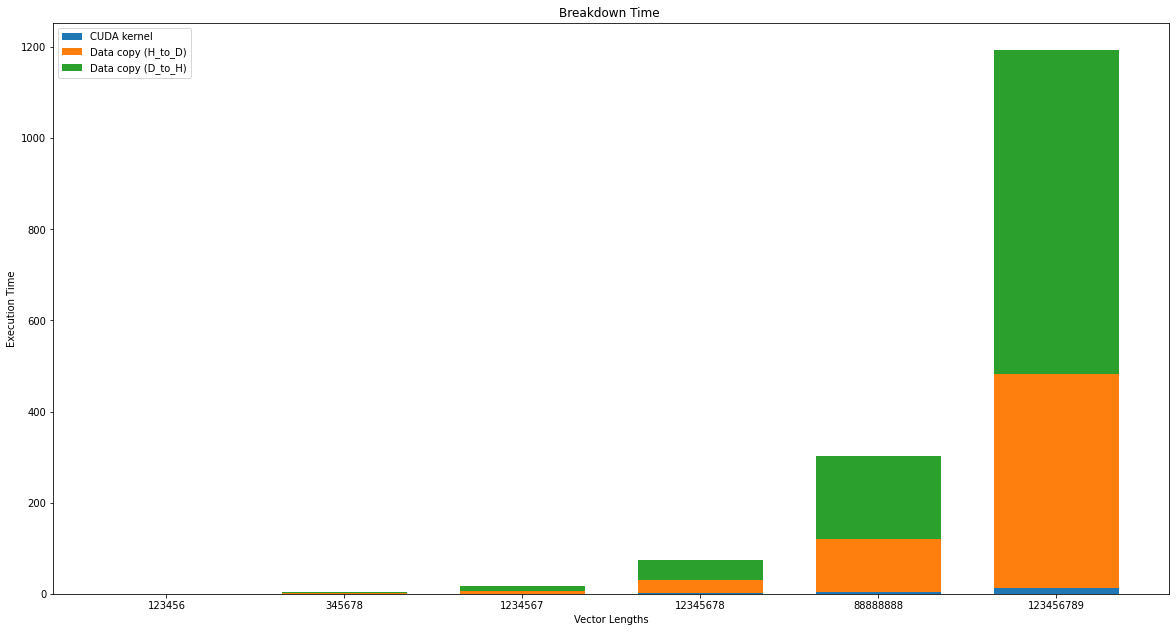

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vector_lengths = ['123456', '345678', '1234567', '12345678', '88888888', '123456789']
datacpy_d2h = np.array([82.046*10**(-3), 1.5917,          9.6424,          44.099,          182.70, 710.40])
cuda_kernel = np.array([10.783*10**(-3), 43.647*10**(-3), 186.52*10**(-3), 757.62*10**(-3), 3.0397, 12.208])
datacpy_h2d = np.array([175.84*10**(-3), 1.5292,          6.8853,          29.527,          116.37, 470.74])

width = 0.7
fig, ax = plt.subplots(1)

ax.bar(vector_lengths, cuda_kernel, width, label='CUDA kernel')
ax.bar(vector_lengths, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H_to_D)')
ax.bar(vector_lengths, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D_to_H)')

ax.set_xlabel('Vector Lengths')
ax.set_ylabel('Execution Time')
ax.set_title('Breakdown Time ')
ax.legend()



fig.set_size_inches(20, 10.5, forward=True)
plt.show()